In [1]:
import pandas as pd
#Para to show all columns and lines 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
 
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV 
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))
    
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#importing the data
#seting the file path
path = '/Users/schama/Desktop/Mirror/00FSU/00CoursesSpring2023/ProjectsDataSci/Assignment4/'

# Read the data
data = pd.read_csv(path+"1-s2.0-S1055790318306365-mmc2.csv")
print("Data imported as 'data', with dimensions:", data.shape)

Data imported as 'data', with dimensions: (124, 112)


#### Cleaning the data to be able to sue with SVM

In [3]:
list(data.columns)

['Species',
 'SpecID',
 'Catalog #',
 'Molecules?',
 'Length (mm)',
 'Height (mm)',
 'Width (mm)',
 'Mass (grams)',
 'Colors',
 'Rays?',
 'Centroid Size',
 'Female?',
 '1x',
 '1y',
 '2x',
 '2y',
 '3x',
 '3y',
 '4x',
 '4y',
 '5x',
 '5y',
 '6x',
 '6y',
 '7x',
 '7y',
 '8x',
 '8y',
 '9x',
 '9y',
 '10x',
 '10y',
 '11x',
 '11y',
 '12x',
 '12y',
 '13x',
 '13y',
 '14x',
 '14y',
 '15x',
 '15y',
 '16x',
 '16y',
 '17x',
 '17y',
 '18x',
 '18y',
 '19x',
 '19y',
 '20x',
 '20y',
 '21x',
 '21y',
 '22x',
 '22y',
 '23x',
 '23y',
 '24x',
 '24y',
 '25x',
 '25y',
 '26x',
 '26y',
 '27x',
 '27y',
 '28x',
 '28y',
 '29x',
 '29y',
 '30x',
 '30y',
 '31x',
 '31y',
 '32x',
 '32y',
 '33x',
 '33y',
 '34x',
 '34y',
 '35x',
 '35y',
 '36x',
 '36y',
 '37x',
 '37y',
 '38x',
 '38y',
 '39x',
 '39y',
 '40x',
 '40y',
 '41x',
 '41y',
 '42x',
 '42y',
 '43x',
 '43y',
 '44x',
 '44y',
 '45x',
 '45y',
 '46x',
 '46y',
 '47x',
 '47y',
 '48x',
 '48y',
 '49x',
 '49y',
 '50x',
 '50y']

In [4]:
# dropping unwanted columns
data.drop(['Catalog #',
 'Molecules?','Female?','1x',
 '1y',
 '2x',
 '2y',
 '3x',
 '3y',
 '4x',
 '4y',
 '5x',
 '5y',
 '6x',
 '6y',
 '7x',
 '7y',
 '8x',
 '8y',
 '9x',
 '9y',
 '10x',
 '10y',
 '11x',
 '11y',
 '12x',
 '12y',
 '13x',
 '13y',
 '14x',
 '14y',
 '15x',
 '15y',
 '16x',
 '16y',
 '17x',
 '17y',
 '18x',
 '18y',
 '19x',
 '19y',
 '20x',
 '20y',
 '21x',
 '21y',
 '22x',
 '22y',
 '23x',
 '23y',
 '24x',
 '24y',
 '25x',
 '25y',
 '26x',
 '26y',
 '27x',
 '27y',
 '28x',
 '28y',
 '29x',
 '29y',
 '30x',
 '30y',
 '31x',
 '31y',
 '32x',
 '32y',
 '33x',
 '33y',
 '34x',
 '34y',
 '35x',
 '35y',
 '36x',
 '36y',
 '37x',
 '37y',
 '38x',
 '38y',
 '39x',
 '39y',
 '40x',
 '40y',
 '41x',
 '41y',
 '42x',
 '42y',
 '43x',
 '43y',
 '44x',
 '44y',
 '45x',
 '45y',
 '46x',
 '46y',
 '47x',
 '47y',
 '48x',
 '48y',
 '49x',
 '49y',
 '50x',
 '50y'], axis=1, inplace=True)

In [5]:
data.head()

,Species,SpecID,Length (mm),Height (mm),Width (mm),Mass (grams),Colors,Rays?,Centroid Size
0,teres,INHS 89410,132.95,55.10,57.14,121.210,2.0,0.0,349.695400
1,teres,SK-15-001,110.23,43.03,44.25,46.630,2.2,1.0,297.511221
2,teres,SK-15-002,90.43,42.44,37.70,24.360,2.2,0.0,254.112570
3,teres,SK-16-002,108.37,51.06,42.17,49.966,2.6,0.0,297.871862
4,teres,SK-16-003,107.00,50.46,40.22,50.950,2.2,0.0,309.310547


In [6]:
data.Species.unique()

array(['teres', 'sietmani', 'anodontoides', 'anodontoides (m)',
       'anodontoides (f)', 'fallciosa (m)', 'fallciosa (f)',
       'anodontoides anodontoides', 'teres anodontoides', 'teres teres'],
      dtype=object)

In [7]:
# Filtering to get only the two species of interest teres and sietmani
data.loc[data['Species'] == 'teres']

,Species,SpecID,Length (mm),Height (mm),Width (mm),Mass (grams),Colors,Rays?,Centroid Size
0,teres,INHS 89410,132.95,55.10,57.14,121.2100,2.0,0.0,349.695400
1,teres,SK-15-001,110.23,43.03,44.25,46.6300,2.2,1.0,297.511221
2,teres,SK-15-002,90.43,42.44,37.70,24.3600,2.2,0.0,254.112570
3,teres,SK-16-002,108.37,51.06,42.17,49.9660,2.6,0.0,297.871862
4,teres,SK-16-003,107.00,50.46,40.22,50.9500,2.2,0.0,309.310547
5,teres,SK-16-004,91.17,44.10,31.95,21.3230,2.2,0.0,256.705188
6,teres,SK-16-005,77.14,35.12,24.80,9.2300,1.2,0.6,217.232116
7,teres,SK-16-007,111.45,55.28,41.86,54.2820,2.2,0.0,313.358275
8,teres,SK-16-009,107.48,50.53,43.56,48.0760,2.4,0.0,296.878911
9,teres,SK-16-010,98.48,45.95,34.70,24.9230,1.8,0.0,285.374899


In [8]:
# eliminating missing
teres = data.loc[data['Species'] == 'teres']
teres.dropna(inplace=True)
teres

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Species,SpecID,Length (mm),Height (mm),Width (mm),Mass (grams),Colors,Rays?,Centroid Size
0,teres,INHS 89410,132.95,55.10,57.14,121.2100,2.0,0.0,349.695400
1,teres,SK-15-001,110.23,43.03,44.25,46.6300,2.2,1.0,297.511221
2,teres,SK-15-002,90.43,42.44,37.70,24.3600,2.2,0.0,254.112570
3,teres,SK-16-002,108.37,51.06,42.17,49.9660,2.6,0.0,297.871862
4,teres,SK-16-003,107.00,50.46,40.22,50.9500,2.2,0.0,309.310547
5,teres,SK-16-004,91.17,44.10,31.95,21.3230,2.2,0.0,256.705188
6,teres,SK-16-005,77.14,35.12,24.80,9.2300,1.2,0.6,217.232116
7,teres,SK-16-007,111.45,55.28,41.86,54.2820,2.2,0.0,313.358275
8,teres,SK-16-009,107.48,50.53,43.56,48.0760,2.4,0.0,296.878911
9,teres,SK-16-010,98.48,45.95,34.70,24.9230,1.8,0.0,285.374899


In [9]:
data.loc[data['Species'] == 'sietmani']

,Species,SpecID,Length (mm),Height (mm),Width (mm),Mass (grams),Colors,Rays?,Centroid Size
69,sietmani,8052.2,118.00,57.79,43.85,58.546,1.2,0.0,336.717557
70,sietmani,8052.3,97.32,44.19,34.33,34.673,1.2,0.0,271.473690
71,sietmani,SK-16-065,127.26,64.28,45.66,79.525,1.2,0.0,370.346692
72,sietmani,JBM 4917,117.58,58.57,46.19,71.663,1.0,0.0,340.113628
73,sietmani,SK-17-001,133.85,70.40,51.91,114.953,1.4,0.0,381.900228
74,sietmani,SK-17-002,121.05,65.06,45.31,81.062,1.2,0.0,359.480671
75,sietmani,SK-17-003,126.80,68.48,47.46,98.814,1.2,0.0,371.282863
76,sietmani,SK-17-006,131.74,65.23,47.75,85.437,1.0,0.4,383.021200
77,sietmani,SK-17-007,106.56,50.25,37.03,42.080,1.0,0.0,310.332796
78,sietmani,SK-17-008,128.54,69.60,50.83,119.994,2.6,0.0,381.239613


In [10]:
siet = data.loc[data['Species'] == 'sietmani']
siet.dropna(inplace=True)
siet

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Species,SpecID,Length (mm),Height (mm),Width (mm),Mass (grams),Colors,Rays?,Centroid Size
69,sietmani,8052.2,118.00,57.79,43.85,58.546,1.2,0.0,336.717557
70,sietmani,8052.3,97.32,44.19,34.33,34.673,1.2,0.0,271.473690
71,sietmani,SK-16-065,127.26,64.28,45.66,79.525,1.2,0.0,370.346692
72,sietmani,JBM 4917,117.58,58.57,46.19,71.663,1.0,0.0,340.113628
73,sietmani,SK-17-001,133.85,70.40,51.91,114.953,1.4,0.0,381.900228
74,sietmani,SK-17-002,121.05,65.06,45.31,81.062,1.2,0.0,359.480671
75,sietmani,SK-17-003,126.80,68.48,47.46,98.814,1.2,0.0,371.282863
76,sietmani,SK-17-006,131.74,65.23,47.75,85.437,1.0,0.4,383.021200
77,sietmani,SK-17-007,106.56,50.25,37.03,42.080,1.0,0.0,310.332796
78,sietmani,SK-17-008,128.54,69.60,50.83,119.994,2.6,0.0,381.239613


In [11]:
# Both species together for a final dataset
final = pd.concat([teres, siet], axis=0)
final

,Species,SpecID,Length (mm),Height (mm),Width (mm),Mass (grams),Colors,Rays?,Centroid Size
0,teres,INHS 89410,132.95,55.10,57.14,121.2100,2.0,0.0,349.695400
1,teres,SK-15-001,110.23,43.03,44.25,46.6300,2.2,1.0,297.511221
2,teres,SK-15-002,90.43,42.44,37.70,24.3600,2.2,0.0,254.112570
3,teres,SK-16-002,108.37,51.06,42.17,49.9660,2.6,0.0,297.871862
4,teres,SK-16-003,107.00,50.46,40.22,50.9500,2.2,0.0,309.310547
5,teres,SK-16-004,91.17,44.10,31.95,21.3230,2.2,0.0,256.705188
6,teres,SK-16-005,77.14,35.12,24.80,9.2300,1.2,0.6,217.232116
7,teres,SK-16-007,111.45,55.28,41.86,54.2820,2.2,0.0,313.358275
8,teres,SK-16-009,107.48,50.53,43.56,48.0760,2.4,0.0,296.878911
9,teres,SK-16-010,98.48,45.95,34.70,24.9230,1.8,0.0,285.374899


In [12]:
# eliminating identification column
final.drop(['SpecID'], axis=1, inplace=True)

In [13]:
final.shape

(89, 8)

In [14]:
# renaming columns to be able to manipulate better
final.rename(columns={'Length (mm)': 'Length', 'Height (mm)': 'Height', 'Width (mm)': 'Width', 'Mass (grams)': 'Mass', 'Rays?':'Rays'}, inplace=True)

In [15]:
final.head()

,Species,Length,Height,Width,Mass,Colors,Rays,Centroid Size
0,teres,132.95,55.10,57.14,121.210,2.0,0.0,349.695400
1,teres,110.23,43.03,44.25,46.630,2.2,1.0,297.511221
2,teres,90.43,42.44,37.70,24.360,2.2,0.0,254.112570
3,teres,108.37,51.06,42.17,49.966,2.6,0.0,297.871862
4,teres,107.00,50.46,40.22,50.950,2.2,0.0,309.310547


In [15]:
# saving final dataset to csv
final.to_csv('LampsilisData.csv', index=False)

In [17]:
# Doing PCA
y = final.Species.replace(['teres','sietmani'], [0,1])
target_names = ['teres','sietmani']
final_pca = final.drop(['Species'], axis=1)

pca = PCA(n_components=2)
pca_2 = pca.fit(final_pca).transform(final_pca)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.97248292 0.0234779 ]


Text(0.5, 1.0, 'PCA of Lampsilis dataset')

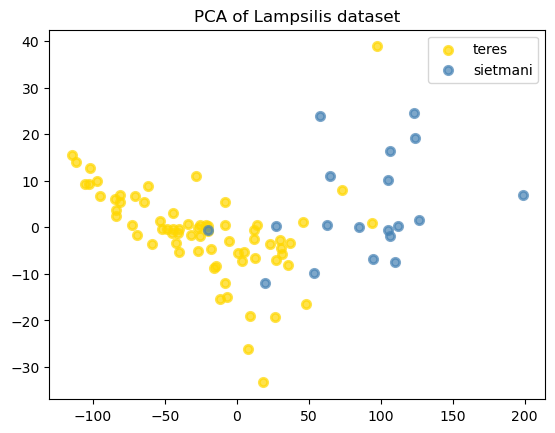

In [18]:
# Plotting PCA
plt.figure()

plt.style.use('default')
colors = ["gold", "steelblue"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(
        pca_2[y == i, 0], pca_2[y == i, 1], color=color, alpha =0.7, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Lampsilis dataset")

Text(0.5, 1.0, 'PCA of Lampsilis dataset')

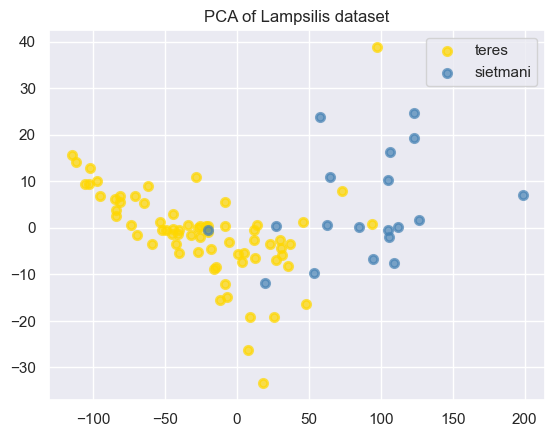

In [19]:
# Ploting to look more of the aesthetic the other plots we are using have
plt.figure()
#plt.style.use('dark_background')
import seaborn as sns; sns.set()
#plt.style.use('default')
colors = ["gold", "steelblue"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(
        pca_2[y == i, 0], pca_2[y == i, 1], color=color, alpha =0.7, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Lampsilis dataset")

In [21]:
pca_2.shape

(89, 2)

In [19]:
# Just looking at three components with PCA
y = final.Species.replace(['teres','sietmani'], [0,1])
target_names = ['teres','sietmani']
final_pca = final.drop(['Species'], axis=1)
pca3 = PCA(n_components=3)
pca_3 = pca3.fit(final_pca).transform(final_pca)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first three components): %s"
    % str(pca3.explained_variance_ratio_)
)

explained variance ratio (first three components): [0.97248292 0.0234779  0.00235631]


## SVM

Code below is for the the linear and non linear SVM, with and without the parameter search grid.

In [22]:
# Making data easy to train and predict
yt = final.Species.replace(['teres','sietmani'], [0,1])
xt = final.drop(['Species'], axis=1)

In [23]:
#Standardizing 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
xts=scaler.fit_transform(xt)

In [24]:
# first linear svm without searching for parameters
linear_svm = LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=1000)
linear_svm.fit(xts, yt)

cv = cross_val_score(linear_svm,xt,yt,cv=5)

print(cv)
print(cv.mean())

[0.88888889 1.         1.         1.         0.94117647]
0.9660130718954247


In [25]:
# doing a search for best paramters with a grid search
param_grid = tuned_parameters = [{'loss': ['hinge'], 'dual': [True],'C': [.1, 1, 10, 100, 1000]},
                                 {'loss': ['squared_hinge'],'dual': [True, False], 'C': [.1, 1, 10, 100, 1000]},
                                 ]
clf_svc = GridSearchCV(linear_svm, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(xt,yt)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
SVC
Best Score: 0.9660130718954247
Best Parameters: {'C': 0.1, 'dual': False, 'loss': 'squared_hinge'}


In [26]:
# second linear svm with best parameters
linear_svm = LinearSVC(loss='squared_hinge', dual=False, C=0.1, max_iter=1000)
linear_svm.fit(xts, yt)

cv = cross_val_score(linear_svm,xt,yt,cv=5)

print(cv)
print(cv.mean())

[0.88888889 1.         1.         1.         0.94117647]
0.9660130718954247


In [27]:
# Non linear SVM without parameter search
svc = SVC()
cv = cross_val_score(svc,xt,yt,cv=5)
print(cv)
print(cv.mean())

[0.77777778 1.         0.77777778 0.88888889 1.        ]
0.888888888888889


In [28]:
# doing a search for best paramters with a grid search
svc = SVC()
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(xt,yt)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.9660130718954247
Best Parameters: {'C': 1, 'kernel': 'linear'}


In [30]:
# second Non linear SVM with best parameters
svc = SVC(C=1, kernel='linear')
cv = cross_val_score(svc,xt,yt,cv=5)
print(cv)
print(cv.mean())

[0.88888889 1.         1.         1.         0.94117647]
0.9660130718954247


#### Making the final plot figure

In [ ]:
import plotly_express as px
px.scatter_3d(final, x="Length", y="Width", z="Height", size="Mass", 
              color="Species", color_discrete_map = {"teres": "yellow", "sietmani": "steelblue"})

#### Reference

Dataset was dowloaded from the journal Molecular Phylogenetics and Evolution paper: https://www.sciencedirect.com/science/article/abs/pii/S1055790318306365.